In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

In [3]:
# ==========================================
# ANALISIS KOMENTAR YOUTUBE (SENTIMEN, TOXIC, SPAM, "AI")
# ==========================================

# -----------------------------
# 1. Load Data
# -----------------------------
# Ubah path kalau file kamu beda lokasi
df = pd.read_csv("youtube_comments_labeled_rule_based.csv")

print("Jumlah komentar:", len(df))
print(df.head(), "\n")

# Pastikan kolom penting ada
print("Kolom yang tersedia:", df.columns.tolist(), "\n")

Jumlah komentar: 1055
                   date               username  \
0  2025-11-13T01:33:25Z         @MsIrawati-v9h   
1  2025-11-13T01:32:26Z         @MsIrawati-v9h   
2  2025-11-11T03:05:54Z  @edysrihermayudha6697   
3  2025-10-31T04:09:21Z    @darmawandesign7820   
4  2025-10-28T06:56:32Z          @DJOE_TOKDJOE   

                                        comment_text  is_reply reply_to  \
0  Lama lama manusia di ganti robot...tidak berma...     False      NaN   
1  AI kalau boleh tidak usah di kembangkan di Ind...     False      NaN   
2  AI klo kita sebagai manusia tidak memanfaatkan...     False      NaN   
3  ⛔AI sekarang lebih canggih... bisa menyerap iD...     False      NaN   
4  Bisa gak Hacker2 jago.. menghancurkan A.I itu ...     False      NaN   

  sentiment_label toxic_label spam_label  
0        positive   non_toxic   non_spam  
1        negative   non_toxic   non_spam  
2         neutral   non_toxic   non_spam  
3         neutral   non_toxic   non_spam  
4        ne

=== Distribusi Sentimen ===
sentiment_label
neutral     871
negative     95
positive     89
Name: count, dtype: int64 



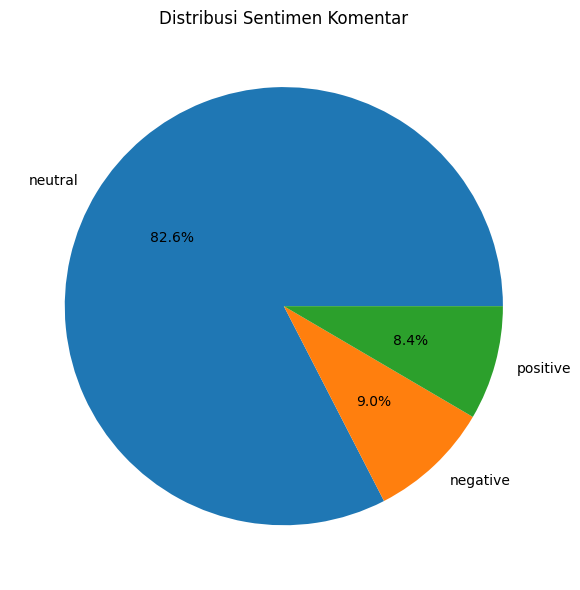

In [4]:
# -----------------------------
# 2. Distribusi Sentimen
# -----------------------------
sent_counts = df["sentiment_label"].value_counts()

print("=== Distribusi Sentimen ===")
print(sent_counts, "\n")

plt.figure(figsize=(6, 6))
plt.pie(
    sent_counts,
    labels=sent_counts.index,
    autopct="%1.1f%%"
)
plt.title("Distribusi Sentimen Komentar")
plt.tight_layout()
plt.show()


=== Distribusi Toxic ===
toxic_label
non_toxic    1033
toxic          22
Name: count, dtype: int64 



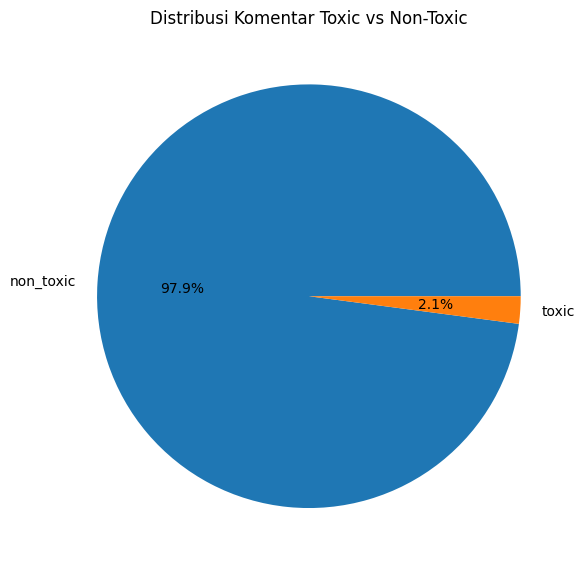

In [5]:
# -----------------------------
# 3. Distribusi Toxic vs Non-Toxic
# -----------------------------
if "toxic_label" in df.columns:
    toxic_counts = df["toxic_label"].value_counts()
    print("=== Distribusi Toxic ===")
    print(toxic_counts, "\n")

    plt.figure(figsize=(6, 6))
    plt.pie(
        toxic_counts,
        labels=toxic_counts.index,
        autopct="%1.1f%%"
    )
    plt.title("Distribusi Komentar Toxic vs Non-Toxic")
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'toxic_label' tidak ditemukan.\n")

=== Distribusi Spam ===
spam_label
non_spam    1012
spam          43
Name: count, dtype: int64 



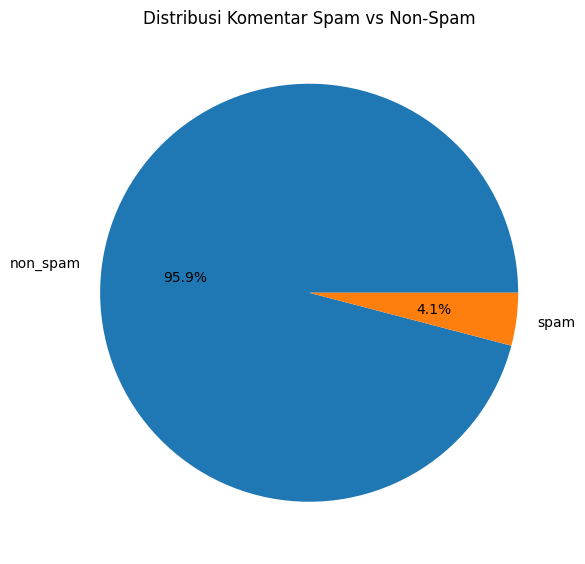

In [6]:
# -----------------------------
# 4. Distribusi Spam vs Non-Spam
# -----------------------------
if "spam_label" in df.columns:
    spam_counts = df["spam_label"].value_counts()
    print("=== Distribusi Spam ===")
    print(spam_counts, "\n")

    plt.figure(figsize=(6, 6))
    plt.pie(
        spam_counts,
        labels=spam_counts.index,
        autopct="%1.1f%%"
    )
    plt.title("Distribusi Komentar Spam vs Non-Spam")
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'spam_label' tidak ditemukan.\n")

=== Komentar yang menyebut 'AI' ===
Jumlah komentar yang mengandung 'AI': 560

Distribusi sentimen khusus komentar 'AI':
sentiment_label
neutral     458
negative     69
positive     33
Name: count, dtype: int64 



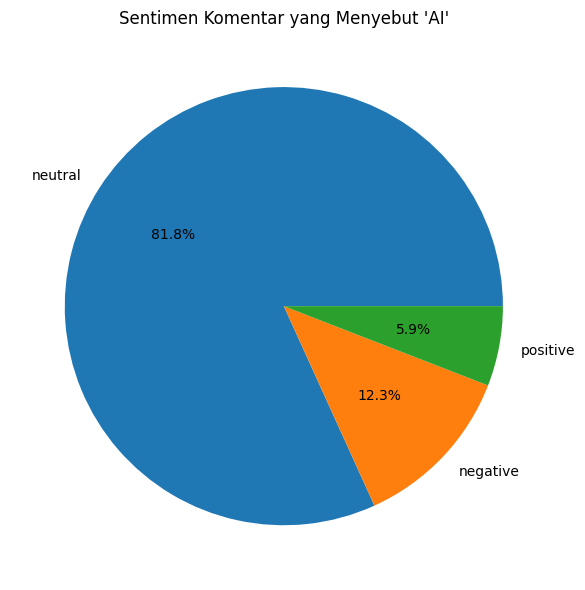

In [7]:
# -----------------------------
# 5. Analisis Khusus Komentar yang Mengandung 'AI'
# -----------------------------
def contains_ai(text):
    if not isinstance(text, str):
        return False
    # cari kata 'ai' (case-insensitive), boleh nempel simbol
    return bool(re.search(r"\bai\b", text.lower()))

df["contains_ai"] = df["comment_text"].apply(contains_ai)

df_ai = df[df["contains_ai"] == True]

print("=== Komentar yang menyebut 'AI' ===")
print("Jumlah komentar yang mengandung 'AI':", len(df_ai))

if len(df_ai) > 0:
    ai_sent_counts = df_ai["sentiment_label"].value_counts()
    print("\nDistribusi sentimen khusus komentar 'AI':")
    print(ai_sent_counts, "\n")

    plt.figure(figsize=(6, 6))
    plt.pie(
        ai_sent_counts,
        labels=ai_sent_counts.index,
        autopct="%1.1f%%"
    )
    plt.title("Sentimen Komentar yang Menyebut 'AI'")
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada komentar yang mengandung kata 'AI'.\n")


=== 30 Kata Terbanyak (semua komentar) ===
ai              : 1074
dan             : 448
yang            : 389
di              : 383
yg              : 370
bisa            : 335
untuk           : 225
itu             : 222
ini             : 209
manusia         : 200
ada             : 200
kita            : 161
akan            : 151
saya            : 148
orang           : 142
dari            : 139
dengan          : 130
belajar         : 129
tapi            : 127
nya             : 127
tidak           : 121
sama            : 121
jadi            : 120
buat            : 117
karena          : 115
juga            : 111
lebih           : 109
atau            : 101
ya              : 97
ke              : 95

=== 20 Kata Terbanyak di Komentar NEGATIF ===
ai              : 227
dan             : 124
di              : 114
yg              : 87
yang            : 84
manusia         : 74
untuk           : 63
bisa            : 60
ini             : 59
itu             : 45
akan            : 41
dengan          :

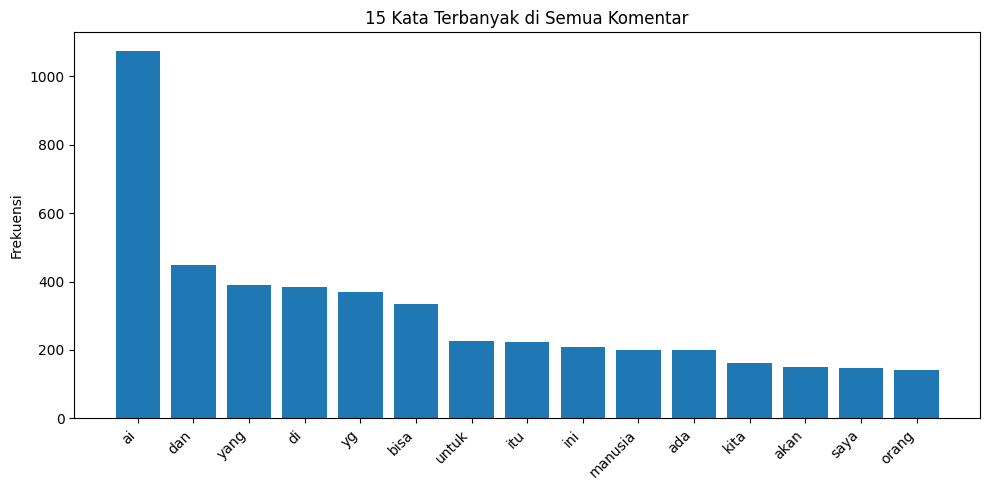

Analisis selesai ✅


In [8]:
# -----------------------------
# 6. Analisis Kata Terbanyak
#    (Seluruh komentar + per sentimen)
# -----------------------------
def simple_tokenize(text):
    if not isinstance(text, str):
        return []
    text = text.lower()
    # hapus karakter non huruf/angka diganti spasi
    text = re.sub(r"[^a-z0-9à-ž]+", " ", text)
    tokens = text.split()
    # boleh filter stopword kalau mau, tapi sekarang kita biarkan dulu
    return tokens

# --- 6a. Top kata keseluruhan ---
all_tokens = []

for t in df["comment_text"]:
    all_tokens.extend(simple_tokenize(t))

freq_all = Counter(all_tokens)
top_all = freq_all.most_common(30)

print("=== 30 Kata Terbanyak (semua komentar) ===")
for kata, freq in top_all:
    print(f"{kata:15s} : {freq}")
print()

# --- 6b. Top kata komentar NEGATIF ---
neg_tokens = []
for t in df[df["sentiment_label"] == "negative"]["comment_text"]:
    neg_tokens.extend(simple_tokenize(t))

freq_neg = Counter(neg_tokens)
top_neg = freq_neg.most_common(20)

print("=== 20 Kata Terbanyak di Komentar NEGATIF ===")
for kata, freq in top_neg:
    print(f"{kata:15s} : {freq}")
print()

# --- 6c. Top kata komentar POSITIF ---
pos_tokens = []
for t in df[df["sentiment_label"] == "positive"]["comment_text"]:
    pos_tokens.extend(simple_tokenize(t))

freq_pos = Counter(pos_tokens)
top_pos = freq_pos.most_common(20)

print("=== 20 Kata Terbanyak di Komentar POSITIF ===")
for kata, freq in top_pos:
    print(f"{kata:15s} : {freq}")
print()

# (Opsional) Barplot untuk kata terbanyak semua komentar
top_words, top_counts = zip(*top_all[:15])  # ambil 15 teratas saja

plt.figure(figsize=(10, 5))
plt.bar(top_words, top_counts)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frekuensi")
plt.title("15 Kata Terbanyak di Semua Komentar")
plt.tight_layout()
plt.show()

print("Analisis selesai ✅")

In [18]:
# ==========================================
# MODEL SENTIMEN SUPERVISED (TF-IDF + Logistic Regression)
# ==========================================
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import pandas as pd
import re


In [10]:
# -----------------------------
# 2. Cleaning level DataFrame
# -----------------------------

# buang baris tanpa teks
df = df.dropna(subset=["comment_text"])

# buang duplikat komentar
df = df.drop_duplicates(subset=["comment_text"])

# opsional: buang komentar yang terlalu pendek (misal < 3 karakter)
df = df[df["comment_text"].str.len() >= 3]

print("Jumlah setelah cleaning:", len(df), "\n")

Jumlah setelah cleaning: 1044 



In [11]:
# -----------------------------
# 3. Cleaning level teks
#    (fungsi sederhana)
# -----------------------------
def clean_text(text):
    text = str(text).lower()
    # hapus url
    text = re.sub(r"http\S+|www\.\S+", " ", text)
    # hapus mention @xxx
    text = re.sub(r"@\w+", " ", text)
    # hapus karakter non huruf/angka (sisakan spasi)
    text = re.sub(r"[^a-z0-9à-ž]+", " ", text)
    # hapus spasi berlebih
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_text"] = df["comment_text"].apply(clean_text)

print("Contoh sebelum & sesudah cleaning:\n")
for i in range(3):
    print("ORI :", df.iloc[i]["comment_text"])
    print("CLN :", df.iloc[i]["clean_text"])
    print("---")


Contoh sebelum & sesudah cleaning:

ORI : Lama lama manusia di ganti robot...tidak bermanfaat..
CLN : lama lama manusia di ganti robot tidak bermanfaat
---
ORI : AI kalau boleh tidak usah di kembangkan di Indonesia...ada manfaatnya AI tapi dampaknya buruk
CLN : ai kalau boleh tidak usah di kembangkan di indonesia ada manfaatnya ai tapi dampaknya buruk
---
ORI : AI klo kita sebagai manusia tidak memanfaatkan AI ya kita yang sebagai tenaga kerja disembelih sama AI, lu sadar gak nanti mobil motor juga bisa jadi robot. Karena AI.
CLN : ai klo kita sebagai manusia tidak memanfaatkan ai ya kita yang sebagai tenaga kerja disembelih sama ai lu sadar gak nanti mobil motor juga bisa jadi robot karena ai
---


In [12]:
# -----------------------------
# 4. Siapkan label untuk SENTIMEN
# -----------------------------
# kalau mau fokus ke 3 kelas: positive / negative / neutral
df_sent = df[df["sentiment_label"].isin(["positive", "negative", "neutral"])].copy()

X = df_sent["clean_text"]
y = df_sent["sentiment_label"]

print("\nJumlah data sentimen:", len(df_sent))
print("Distribusi label:\n", y.value_counts(), "\n")


Jumlah data sentimen: 1044
Distribusi label:
 sentiment_label
neutral     860
negative     95
positive     89
Name: count, dtype: int64 



In [19]:
# -----------------------------
# TF-IDF VECTORISATION
# (SMOTE harus dilakukan SETELAH TF-IDF)
# -----------------------------
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=3)
X_tfidf = tfidf.fit_transform(X)

# -----------------------------
# SMOTE PROCESS
# -----------------------------
print("Distribusi sebelum SMOTE:")
print(y.value_counts(), "\n")

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_tfidf, y)

print("Distribusi setelah SMOTE:")
print(pd.Series(y_resampled).value_counts(), "\n")

Distribusi sebelum SMOTE:
sentiment_label
neutral     860
negative     95
positive     89
Name: count, dtype: int64 

Distribusi setelah SMOTE:
sentiment_label
positive    860
negative    860
neutral     860
Name: count, dtype: int64 



In [20]:
# -----------------------------
# 5. Split train/test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)



In [21]:
# -----------------------------
# 6. Pipeline TF-IDF + Logistic Regression
# -----------------------------
clf = LogisticRegression(max_iter=300)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [22]:
# -----------------------------
# EVALUATION
# -----------------------------
y_pred = clf.predict(X_test)

print("=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

print("=== CONFUSION MATRIX ===")
print(confusion_matrix(y_test, y_pred))

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

    negative       0.95      0.96      0.96       172
     neutral       0.86      0.94      0.90       172
    positive       0.98      0.89      0.93       172

    accuracy                           0.93       516
   macro avg       0.93      0.93      0.93       516
weighted avg       0.93      0.93      0.93       516

=== CONFUSION MATRIX ===
[[165   7   0]
 [  8 161   3]
 [  0  19 153]]


In [27]:
# -----------------------------
# 9. Fungsi helper untuk prediksi 1 teks
# -----------------------------
def predict_sentiment(text):
    text_clean = clean_text(text)
    # Vectorize the cleaned text using the fitted tfidf vectorizer
    text_vectorized = tfidf.transform([text_clean])
    return clf.predict(text_vectorized)[0]

# Contoh pakai
contoh = [
    "AI ini keren banget, membantu manusia.",
    "Serem banget sumpah, bikin manusia gak kepake.",
    "Biasa aja sih menurut saya."
]

for c in contoh:
    print(f'"{c}" ->', predict_sentiment(c))

"AI ini keren banget, membantu manusia." -> positive
"Serem banget sumpah, bikin manusia gak kepake." -> neutral
"Biasa aja sih menurut saya." -> positive


In [28]:
# ========================
# MODEL TOXIC / NON-TOXIC
# ========================
df_tox = df[df["toxic_label"].isin(["toxic", "non_toxic"])].copy()

X_tox = df_tox["clean_text"]
y_tox = df_tox["toxic_label"]

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_tox, y_tox, test_size=0.2, random_state=42, stratify=y_tox
)

model_toxic = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2), min_df=3)),
    ("clf", LogisticRegression(max_iter=200, class_weight="balanced"))
])

model_toxic.fit(X_train_t, y_train_t)
y_pred_t = model_toxic.predict(X_test_t)

print("=== REPORT TOXIC ===")
print(classification_report(y_test_t, y_pred_t))

def predict_toxic(text):
    return model_toxic.predict([clean_text(text)])[0]


=== REPORT TOXIC ===
              precision    recall  f1-score   support

   non_toxic       0.98      0.99      0.99       205
       toxic       0.00      0.00      0.00         4

    accuracy                           0.97       209
   macro avg       0.49      0.50      0.49       209
weighted avg       0.96      0.97      0.97       209



In [29]:
# ========================
# MODEL SPAM / NON-SPAM
# ========================
df_spam = df[df["spam_label"].isin(["spam", "non_spam"])].copy()

X_spam = df_spam["clean_text"]
y_spam = df_spam["spam_label"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_spam, y_spam, test_size=0.2, random_state=42, stratify=y_spam
)

model_spam = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2), min_df=2)),
    ("clf", LogisticRegression(max_iter=200, class_weight="balanced"))
])

model_spam.fit(X_train_s, y_train_s)
y_pred_s = model_spam.predict(X_test_s)

print("=== REPORT SPAM ===")
print(classification_report(y_test_s, y_pred_s))

def predict_spam(text):
    return model_spam.predict([clean_text(text)])[0]


=== REPORT SPAM ===
              precision    recall  f1-score   support

    non_spam       0.96      0.97      0.97       200
        spam       0.00      0.00      0.00         9

    accuracy                           0.93       209
   macro avg       0.48      0.49      0.48       209
weighted avg       0.91      0.93      0.92       209



Generating plots for Sentiment, Toxic, and Spam models...


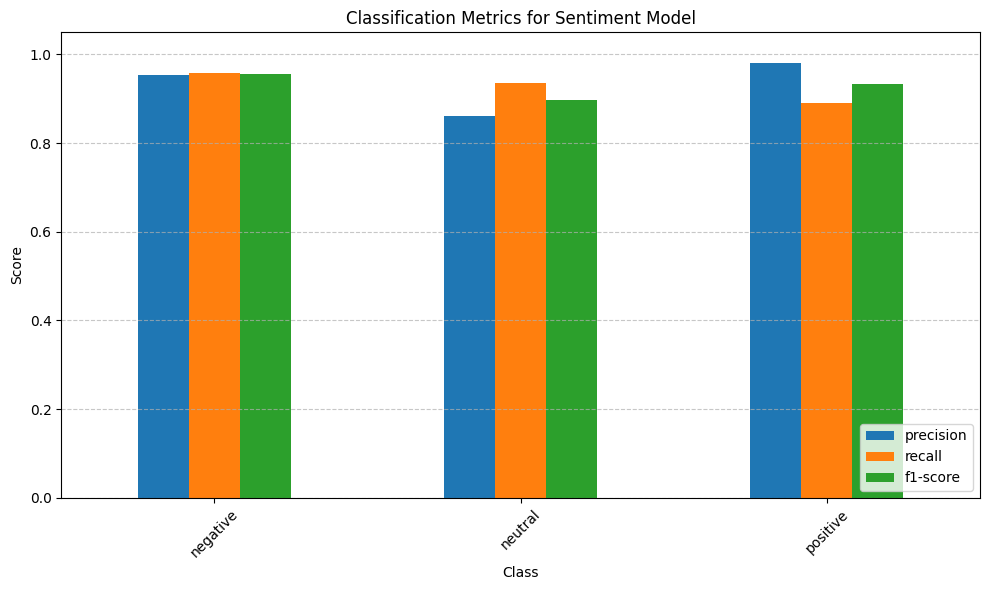

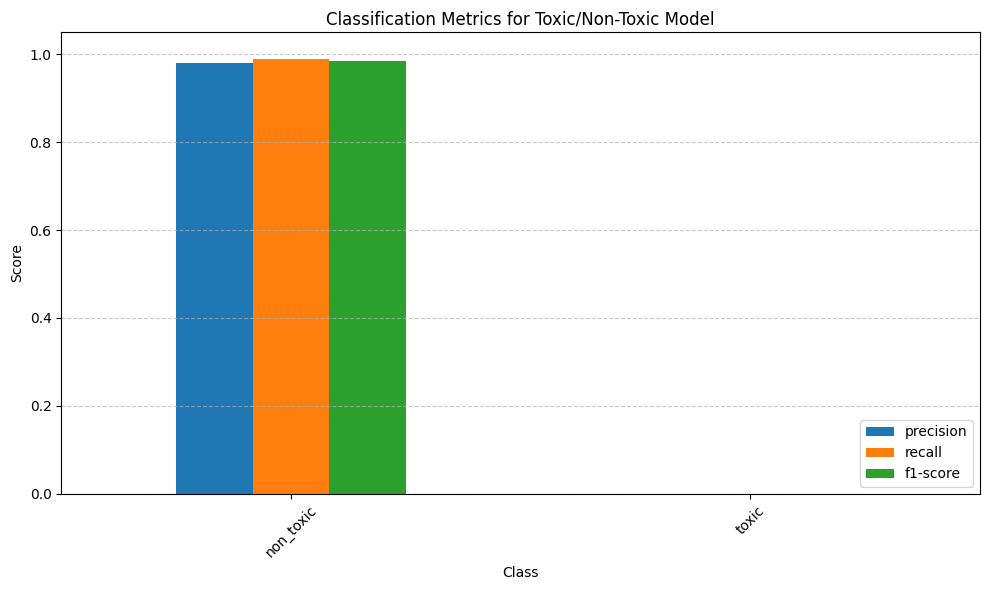

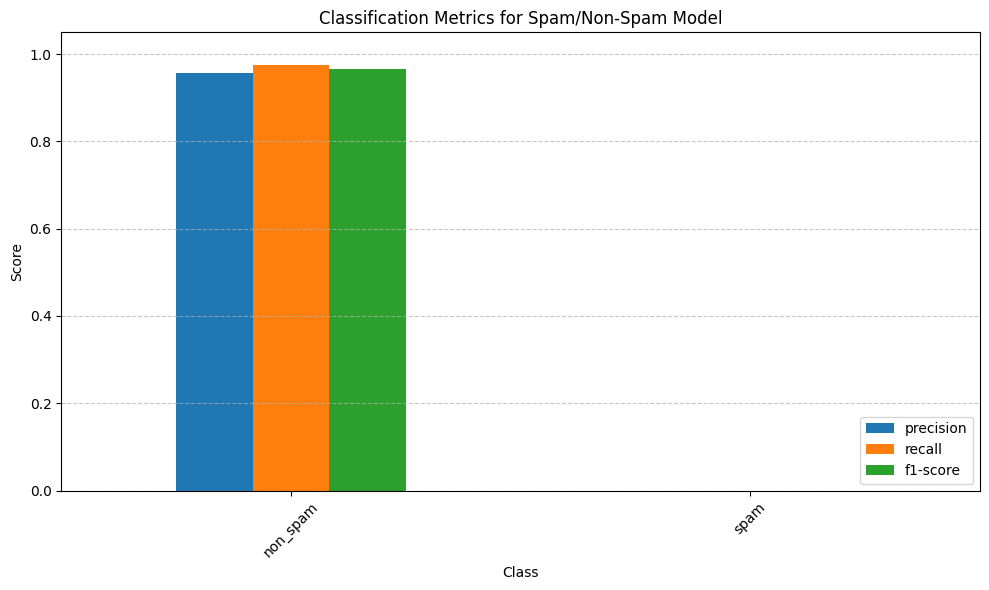

Plots generated successfully ✅


In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Fungsi untuk membuat plot metrik klasifikasi untuk model tertentu
def plot_classification_metrics(y_true, y_pred, title):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    # Saring metrik keseluruhan seperti 'accuracy', 'macro avg', 'weighted avg'
    # untuk hanya menampilkan metrik per kelas untuk plotting
    if 'accuracy' in df_report.index:
        metrics_df = df_report.drop(columns=['support'], errors='ignore').drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')
    else:
        metrics_df = df_report.drop(columns=['support'], errors='ignore')

    metrics_to_plot = ['precision', 'recall', 'f1-score']

    fig, ax = plt.subplots(figsize=(10, 6))
    metrics_df[metrics_to_plot].plot(kind='bar', ax=ax)
    ax.set_title(f'Metrik Klasifikasi untuk Model {title}')
    ax.set_ylabel('Skor')
    ax.set_xlabel('Kelas')
    ax.set_ylim(0, 1.05) # Skor berada di antara 0 dan 1, tambahkan sedikit padding
    ax.tick_params(axis='x', rotation=45)
    plt.legend(loc='lower right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

print("Membuat plot untuk model Sentimen, Toxic, dan Spam...")

# Plot untuk Model Sentimen
plot_classification_metrics(y_test, y_pred, "Sentimen")

# Plot untuk Model Toxic/Non-Toxic
plot_classification_metrics(y_test_t, y_pred_t, "Toxic/Non-Toxic")

# Plot untuk Model Spam/Non-Spam
plot_classification_metrics(y_test_s, y_pred_s, "Spam/Non-Spam")

print("Plot berhasil dibuat ✅")

In [34]:
predict_sentiment("AI ini ngeri banget sumpah")

'negative'

In [35]:
!pip install -q transformers datasets accelerate scikit-learn


In [52]:
!pip install -U transformers datasets accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 40.0 MB/s  0:00:01
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [datasets]


In [36]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split

# Load dari CSV asli (bukan hasil SMOTE)
df = pd.read_csv("youtube_comments_labeled_rule_based.csv")

# Buang komentar kosong / duplikat
df = df.dropna(subset=["comment_text"])
df = df.drop_duplicates(subset=["comment_text"])
df = df[df["comment_text"].str.len() >= 3]

# Ambil hanya label sentimen
df_sent = df[df["sentiment_label"].isin(["positive", "negative", "neutral"])].copy()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\.\S+", " ", text)
    text = re.sub(r"@\w+", " ", text)
    text = re.sub(r"[^a-z0-9à-ž]+", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df_sent["clean_text"] = df_sent["comment_text"].apply(clean_text)

print("Jumlah data:", len(df_sent))
print(df_sent["sentiment_label"].value_counts())
df_sent.head()


Jumlah data: 1044
sentiment_label
neutral     860
negative     95
positive     89
Name: count, dtype: int64


,date,username,comment_text,is_reply,reply_to,sentiment_label,toxic_label,spam_label,clean_text
0,2025-11-13T01:33:25Z,@MsIrawati-v9h,Lama lama manusia di ganti robot...tidak berma...,False,NaN,positive,non_toxic,non_spam,lama lama manusia di ganti robot tidak bermanfaat
1,2025-11-13T01:32:26Z,@MsIrawati-v9h,AI kalau boleh tidak usah di kembangkan di Ind...,False,NaN,negative,non_toxic,non_spam,ai kalau boleh tidak usah di kembangkan di ind...
2,2025-11-11T03:05:54Z,@edysrihermayudha6697,AI klo kita sebagai manusia tidak memanfaatkan...,False,NaN,neutral,non_toxic,non_spam,ai klo kita sebagai manusia tidak memanfaatkan...
3,2025-10-31T04:09:21Z,@darmawandesign7820,⛔AI sekarang lebih canggih... bisa menyerap iD...,False,NaN,neutral,non_toxic,non_spam,ai sekarang lebih canggih bisa menyerap ide ki...
4,2025-10-28T06:56:32Z,@DJOE_TOKDJOE,Bisa gak Hacker2 jago.. menghancurkan A.I itu ...,False,NaN,negative,non_toxic,non_spam,bisa gak hacker2 jago menghancurkan a i itu se...


In [37]:
label_list = ["negative", "neutral", "positive"]  # urutan bebas, tapi konsisten
label2id = {label: i for i, label in enumerate(label_list)}
id2label = {i: label for label, i in label2id.items()}

df_sent["label_id"] = df_sent["sentiment_label"].map(label2id)

df_sent[["clean_text", "sentiment_label", "label_id"]].head()


,clean_text,sentiment_label,label_id
0,lama lama manusia di ganti robot tidak bermanfaat,positive,2
1,ai kalau boleh tidak usah di kembangkan di ind...,negative,0
2,ai klo kita sebagai manusia tidak memanfaatkan...,neutral,1
3,ai sekarang lebih canggih bisa menyerap ide ki...,neutral,1
4,bisa gak hacker2 jago menghancurkan a i itu se...,negative,0


In [38]:
train_df, val_df = train_test_split(
    df_sent,
    test_size=0.2,
    random_state=42,
    stratify=df_sent["label_id"]
)

len(train_df), len(val_df)


(835, 209)

In [39]:
from datasets import Dataset

train_ds = Dataset.from_pandas(train_df[["clean_text", "label_id"]])
val_ds   = Dataset.from_pandas(val_df[["clean_text", "label_id"]])

train_ds, val_ds


(Dataset({
     features: ['clean_text', 'label_id', '__index_level_0__'],
     num_rows: 835
 }),
 Dataset({
     features: ['clean_text', 'label_id', '__index_level_0__'],
     num_rows: 209
 }))

In [40]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "indolem/indobert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(label_list),
    id2label=id2label,
    label2id=label2id
)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
max_length = 128  # cukup untuk komentar

def tokenize_fn(batch):
    return tokenizer(
        batch["clean_text"],
        truncation=True,
        padding="max_length",
        max_length=max_length
    )

train_tokenized = train_ds.map(tokenize_fn, batched=True)
val_tokenized   = val_ds.map(tokenize_fn, batched=True)

# set format untuk PyTorch
train_tokenized = train_tokenized.rename_column("label_id", "labels")
val_tokenized   = val_tokenized.rename_column("label_id", "labels")

train_tokenized.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_tokenized.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])


Map:   0%|          | 0/835 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

In [42]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    f1_macro = f1_score(labels, preds, average="macro")
    return {
        "accuracy": acc,
        "f1_macro": f1_macro,
    }


In [64]:
from transformers import TrainingArguments, Trainer
import os

# Matikan WANDB sepenuhnya
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "disabled"
os.environ["WANDB_PROJECT"] = "off"

output_dir = "indobert-sentiment-youtube"

training_args = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.01,

    logging_steps=20,     # ← ini masih aman di versi lama
    save_steps=200,       # ← versi lama hanya kenal save_steps
    report_to="none",     # ← cegah W&B
)


In [66]:
train_result = trainer.train()
trainer.save_model(output_dir)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


Step,Training Loss
20,0.564900
40,0.571000
60,0.487500
80,0.570600
100,0.564100
120,0.490600
140,0.465100


In [67]:
import pandas as pd

log_df = pd.DataFrame(trainer.state.log_history)
log_df.head()


,loss,grad_norm,learning_rate,epoch,step,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,0.5649,11.101380,0.000018,0.377358,20,NaN,NaN,NaN,NaN,NaN
1,0.5710,9.840259,0.000015,0.754717,40,NaN,NaN,NaN,NaN,NaN
2,0.4875,9.577128,0.000013,1.132075,60,NaN,NaN,NaN,NaN,NaN
3,0.5706,5.798653,0.000010,1.509434,80,NaN,NaN,NaN,NaN,NaN
4,0.5641,10.332855,0.000008,1.886792,100,NaN,NaN,NaN,NaN,NaN


In [70]:
import joblib
import os

# Pastikan direktori 'models' ada
output_dir_models = "models"
os.makedirs(output_dir_models, exist_ok=True)

# 1. Simpan Model Sentimen (Logistic Regression)
filename_sentiment = os.path.join(output_dir_models, "sentiment_logistic_regression_model.joblib")
joblib.dump(clf, filename_sentiment)
print(f"Model sentimen disimpan di: {filename_sentiment}")

# 2. Simpan TF-IDF Vectorizer (untuk Model Sentimen)
filename_tfidf = os.path.join(output_dir_models, "tfidf_vectorizer_sentiment.joblib")
joblib.dump(tfidf, filename_tfidf)
print(f"TF-IDF Vectorizer disimpan di: {filename_tfidf}")

# 3. Simpan Model Toxic/Non-Toxic (Pipeline)
filename_toxic = os.path.join(output_dir_models, "toxic_pipeline_model.joblib")
joblib.dump(model_toxic, filename_toxic)
print(f"Model toxic/non-toxic disimpan di: {filename_toxic}")

# 4. Simpan Model Spam/Non-Spam (Pipeline)
filename_spam = os.path.join(output_dir_models, "spam_pipeline_model.joblib")
joblib.dump(model_spam, filename_spam)
print(f"Model spam/non-spam disimpan di: {filename_spam}")

print("Semua model dan vectorizer berhasil disimpan. ✅")

Model sentimen disimpan di: models/sentiment_logistic_regression_model.joblib
TF-IDF Vectorizer disimpan di: models/tfidf_vectorizer_sentiment.joblib
Model toxic/non-toxic disimpan di: models/toxic_pipeline_model.joblib
Model spam/non-spam disimpan di: models/spam_pipeline_model.joblib
Semua model dan vectorizer berhasil disimpan. ✅
